In [1]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()          # data types + non-null count
df.isnull().sum()  # missing values count per column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
# Make a copy to work with
data = df.copy()

# Fill Age with median
data['Age'] = data['Age'].fillna(data['Age'].median())

# Fill Embarked with most common value (mode)
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Fill Fare if missing (median)
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# For Cabin: too many missing -> replace with "Unknown"
data['Cabin'] = data['Cabin'].fillna('Unknown')

# Drop duplicates if any
data = data.drop_duplicates()


In [6]:
data.info()
data.isnull().sum()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [7]:
data.describe()   # summary stats (mean, min, max, etc.)
data['Survived'].value_counts()  # survived vs not survived count


,count
Survived,
0,549
1,342


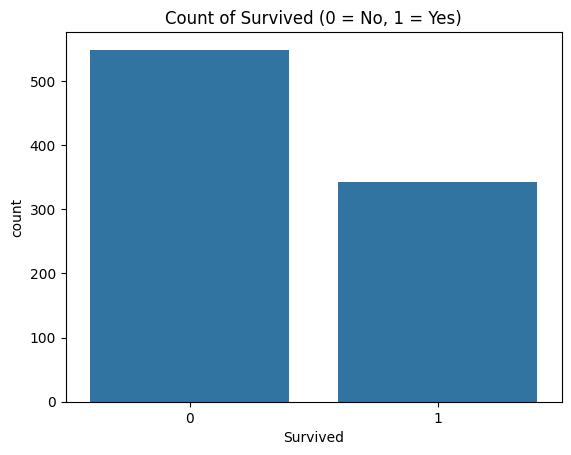

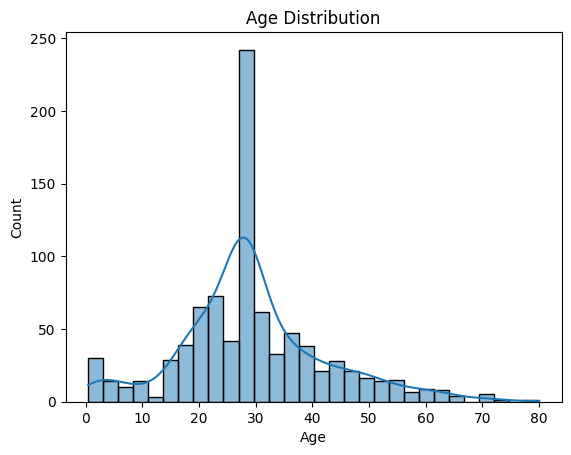

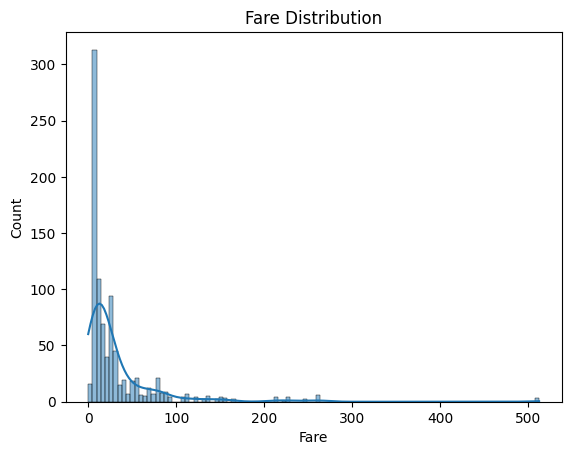

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival count
sns.countplot(x='Survived', data=data)
plt.title('Count of Survived (0 = No, 1 = Yes)')
plt.show()

# Age distribution
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Fare distribution
sns.histplot(data['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()


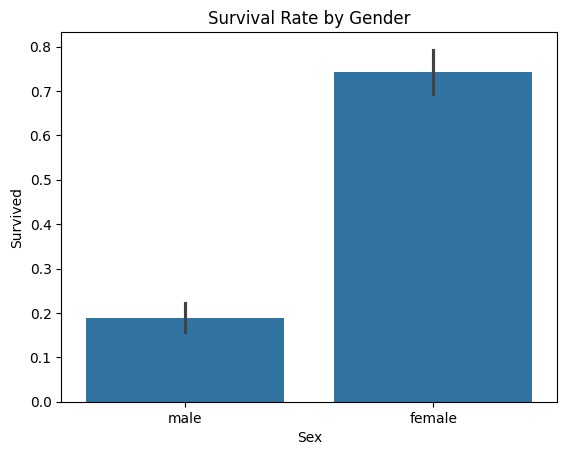

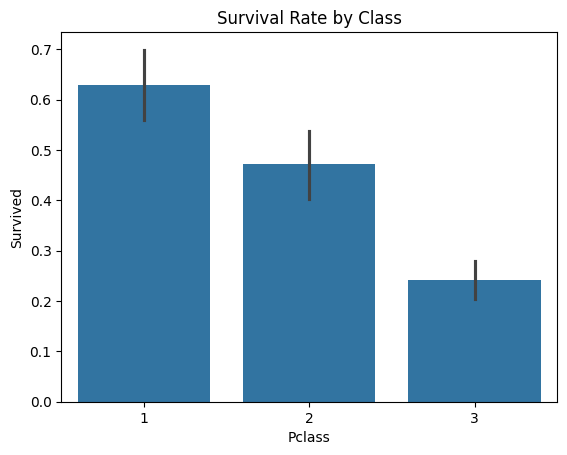

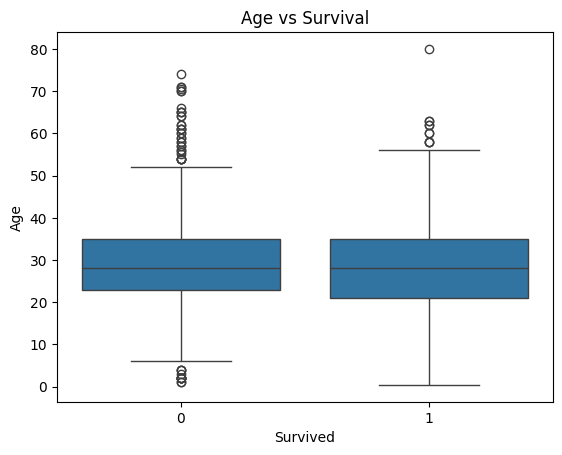

In [9]:
# Survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.show()

# Survival rate by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Class')
plt.show()

# Age vs Survival (Boxplot)
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Age vs Survival')
plt.show()


In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 800x600 with 0 Axes>


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

--- Missing Values After Cleaning ---
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin   

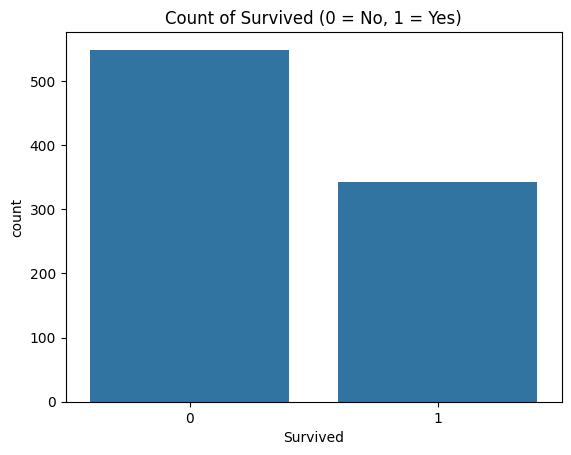

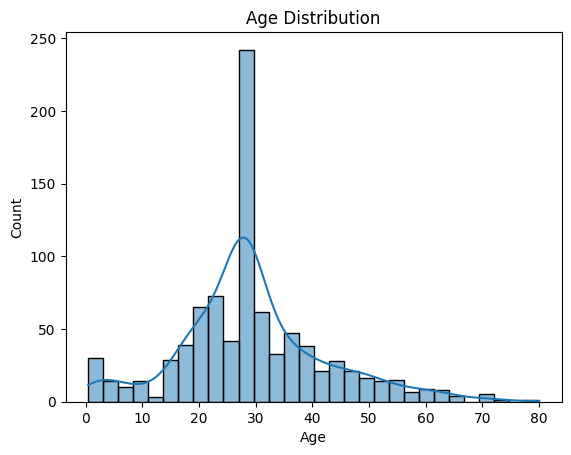

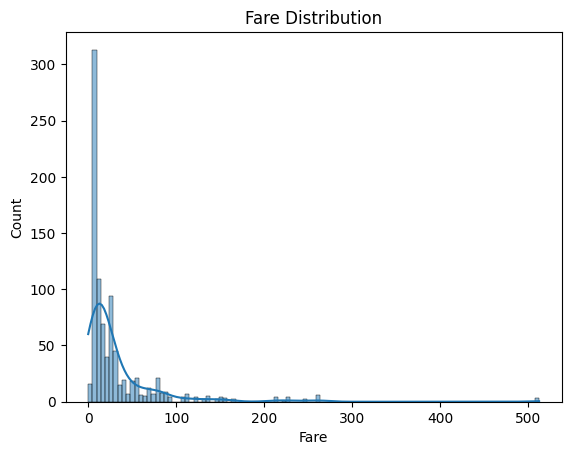

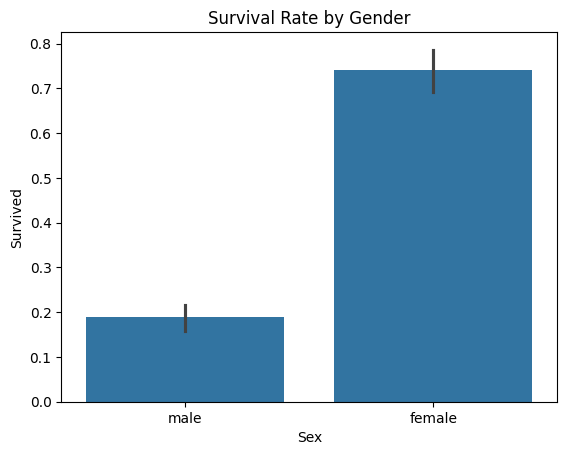

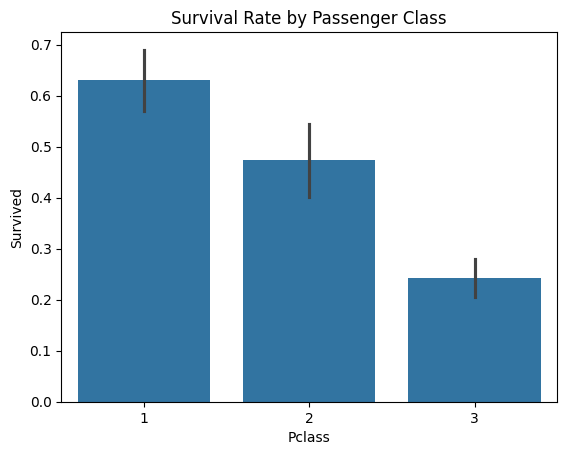

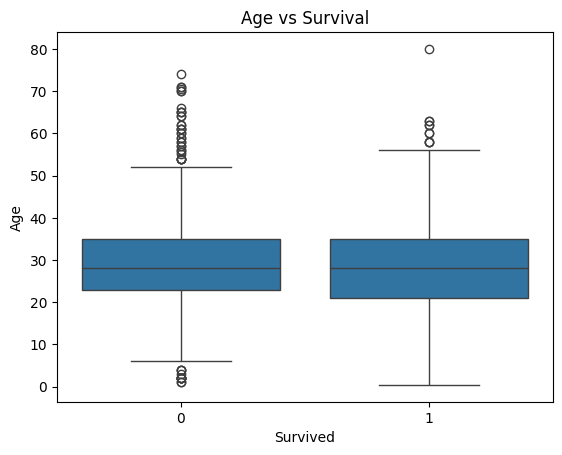

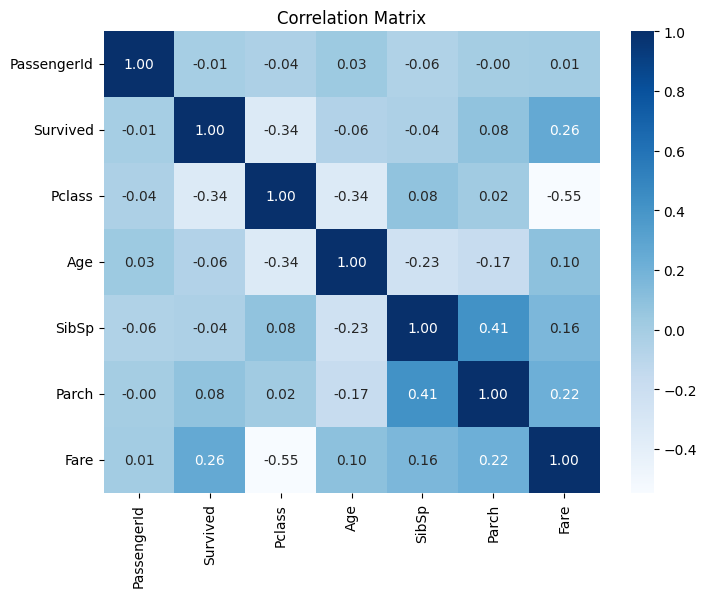

In [11]:
# --- STEP 1: IMPORT LIBRARIES ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- STEP 2: LOAD DATASET ---
# Already uploaded 'train.csv' in Colab
df = pd.read_csv('train.csv')

# --- STEP 3: DATA CLEANING ---
data = df.copy()

# Fill missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Fare'] = data['Fare'].fillna(data['Fare'].median())
data['Cabin'] = data['Cabin'].fillna('Unknown')

# Drop duplicates
data = data.drop_duplicates()

# --- STEP 4: BASIC STATS ---
print("\n--- Dataset Info ---")
print(data.info())

print("\n--- Missing Values After Cleaning ---")
print(data.isnull().sum())

print("\n--- Survival Count ---")
print(data['Survived'].value_counts())

# --- STEP 5: UNIVARIATE ANALYSIS ---
sns.countplot(x='Survived', data=data)
plt.title('Count of Survived (0 = No, 1 = Yes)')
plt.show()

sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(data['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

# --- STEP 6: BIVARIATE ANALYSIS ---
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.show()

sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.show()

sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Age vs Survival')
plt.show()

# --- STEP 7: CORRELATION HEATMAP (NUMERIC ONLY) ---
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation Matrix')
plt.show()


In [12]:
data.to_csv('titanic_cleaned.csv', index=False)


In [13]:
from google.colab import files
files.download('titanic_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>